<a href="https://colab.research.google.com/github/Pyeonseohee/Deeplearning/blob/main/DataScience_Post_Covid19_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# POST - COVID19 데이터 시각화 경진대회

* 가설 1: 코로나 이후 배달량이 늘어 배달완료시간이 오래 걸릴 것이다.

필요한 library 불러오기기

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import os
os.name == 'nt'

False

필요한 csv 파일 불러오기

In [2]:
fpopl = pd.read_csv('/content/drive/MyDrive/Post_Covid19/fpopl.csv')
delivery = pd.read_csv('/content/drive/MyDrive/Post_Covid19/delivery.csv')
index = pd.read_csv('/content/drive/MyDrive/Post_Covid19/index.csv')
confirmed = pd.read_csv('/content/drive/MyDrive/Post_Covid19/Time.csv')
trend = pd.read_csv('/content/drive/MyDrive/Post_Covid19/SearchTrend.csv')

* fpopl : 행정동별 유동인구 데이터
* delivery : 배달 호출 정보 데이터
* index : 품목 별 소비자수 데이터
* confirmed : 누적 확진자수 데이터
* trend : 네이버에서 검색한 키워드별 퍼센트

In [3]:
delivery.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,DLVR_STORE_DONG,DLVR_STORE_RI,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_SIDO,DLVR_DSTN_SIGUNGU,DLVR_DSTN_DONG,DLVR_DSTN_RI,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,합성동,NaN,4812759000,4.812748e+11,4.812710e+09,경상남도,창원시 마산회원구,석전동,NaN,4.812754e+09,4.812748e+11,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,철산동,NaN,4121061000,4.121030e+11,1.154510e+09,서울특별시,금천구,가산동,NaN,1.154551e+09,1.154531e+11,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,갈현동,NaN,1138055100,1.138041e+11,1.138010e+09,서울특별시,은평구,갈현동,NaN,1.138055e+09,1.138041e+11,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,의정부동,NaN,4115051000,4.115043e+11,4.115010e+09,경기도,의정부시,의정부동,NaN,4.115051e+09,4.115043e+11,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,행신동,NaN,4128164000,4.128144e+11,4.128110e+09,경기도,고양시 덕양구,주교동,NaN,4.128151e+09,4.128144e+11,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


delivery 데이터

* SERIAL_NUMBER : 순번
* PROCESS_DT : 처리일시
* DLVR_RQESTER_ID : 배달요청업체 ID
* DLVR_REQUST_STTUS_VALUE : 배달요청상태값( 1:완료, 2:취소, 3:사고, 4:문의)
* DLVR_RCEPT_CMPNY_ID : 배달접수회사 ID
* DLVR_STORE_ID : 배달상점 ID
* DLVR_STORE_INDUTY_NM : 배달상점 업종이름
* DLVR_STORE_LEGALDONG_CODE : 배달상점 주소 법정동코드
* DLVR_STORE_SIDO : 배달상점 주소 법정동 시도명
* DLVR_STORE_SIGUNGU : 배달상점 주소 법정동 시군구명
* DLVR_STORE_DONG : 배달상점 주소 법정동 읍면동명
* DLVR_STORE_RI : 배달상점 주소 법정동 리명
* DLVR_STORE_ADSTRD_CODE : 배달상점 주소 행정동 코드
* DLVR_STORE_RDNMADR_CODE : 배달상점주소 도로명주소 코드
* DLVR_DSTN_LEGALCONG_CODE : 배달목적지 주소 법정동코드
* DLVR_DSTN_SIDO : 배달목적지 주소 법정동 시도명
* DLVR_DSTN_SIGUNGU : 배달목적지 주소 법정동 시군구명
* DLVR_DSTN_DONG : 배달목적지 주소 법정동 읍면동명
* DLVR_DSTN_RI : 배달목적지 주소 법정동 리명
* DLVR_DSTN_ADSTRD_CODE: 배달목적지 주소 행정동 코드
* DLVR_DSTN_RDNMADR_CODE : 배달목적지주소 도로명주소 코드
* DLVR_MAN_ID : 배달기사 ID
* DLVR_AMOUNT : 배달비용
* CALL_RLAY_FEE_AMOUNT : 호출중계수수료금액
* GOODS_AMOUNT : 배달상품금액
* SETLE_KND_VALUE : 결제종류번호 (1:카드, 2:선불, 3:현금)
* SETLE_CARD_CN : 결제카드종류
* DLVR_RCEPT_TIME : 배달접수시간
* DLVR_CARALC_TIME : 배달배차시간
* DLVR_COMPT_TIME : 배달완료시간
* DLVR_CANCL_TIME : 배달취소시간

delivery의 'DLVR_RCEPT_TIME', 'DLVR_COMPT_TIME', 'PROCESS_DT'의 type 확인

In [4]:
type(delivery['DLVR_RCEPT_TIME'][0])

str

In [5]:
type(delivery['DLVR_COMPT_TIME'][0])

str

In [6]:
type(delivery['PROCESS_DT'][0])

str

datatime type으로 바꿔주기

In [7]:
delivery['DLVR_RCEPT_TIME'] = pd.to_datetime(delivery['DLVR_RCEPT_TIME'])
delivery['DLVR_COMPT_TIME'] = pd.to_datetime(delivery['DLVR_COMPT_TIME'])
delivery['PROCESS_DT'] = pd.to_datetime(delivery['PROCESS_DT'])

바뀐 type 확인

In [8]:
type(delivery['DLVR_RCEPT_TIME'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
type(delivery['DLVR_COMPT_TIME'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [10]:
type(delivery['PROCESS_DT'][0])

pandas._libs.tslibs.timestamps.Timestamp

배달시간 계산

In [11]:
time = Series(delivery['DLVR_COMPT_TIME'] - delivery['DLVR_RCEPT_TIME'], dtype = 'object')
time

0          0 days 00:25:48
1          0 days 00:19:30
2          0 days 00:17:33
3          0 days 00:35:14
4          0 days 00:23:54
                ...       
5158319    0 days 00:19:25
5158320    0 days 00:21:05
5158321    0 days 00:19:37
5158322    0 days 00:14:32
5158323    0 days 00:23:32
Length: 5158324, dtype: object

time의 value 값들만 확인

In [12]:
time.values

array([Timedelta('0 days 00:25:48'), Timedelta('0 days 00:19:30'),
       Timedelta('0 days 00:17:33'), ..., Timedelta('0 days 00:19:37'),
       Timedelta('0 days 00:14:32'), Timedelta('0 days 00:23:32')],
      dtype=object)

In [13]:
type(time.values[0])

pandas._libs.tslibs.timedeltas.Timedelta

time을 계산하기 위해 초로 바꾸기

In [14]:
time.values[1].seconds

1170

second 리스트에 값 저장하기

In [15]:
second = []
for i in range(len(time.values)):
  s = time.values[i].seconds
  second.append(s)
second[:10]
len(second)

5158324

In [16]:
second = pd.Series(second)
second[:3] #간단히 보기 위해 3개만 출력

0    1548.0
1    1170.0
2    1053.0
dtype: float64

In [17]:
second = DataFrame(second,columns = ['second'])
second.head()

,second
0,1548.0
1,1170.0
2,1053.0
3,2114.0
4,1434.0


delivery dataframe과 second dataframe 결합.

In [18]:
df = pd.merge(delivery, second, left_index = True, right_index = True)
df.head(10)

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,DLVR_STORE_DONG,DLVR_STORE_RI,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_SIDO,DLVR_DSTN_SIGUNGU,DLVR_DSTN_DONG,DLVR_DSTN_RI,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME,second
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,합성동,NaN,4812759000,4.812748e+11,4.812710e+09,경상남도,창원시 마산회원구,석전동,NaN,4.812754e+09,4.812748e+11,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN,1548.0
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,철산동,NaN,4121061000,4.121030e+11,1.154510e+09,서울특별시,금천구,가산동,NaN,1.154551e+09,1.154531e+11,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN,1170.0
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,갈현동,NaN,1138055100,1.138041e+11,1.138010e+09,서울특별시,은평구,갈현동,NaN,1.138055e+09,1.138041e+11,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN,1053.0
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,의정부동,NaN,4115051000,4.115043e+11,4.115010e+09,경기도,의정부시,의정부동,NaN,4.115051e+09,4.115043e+11,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN,2114.0
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,행신동,NaN,4128164000,4.128144e+11,4.128110e+09,경기도,고양시 덕양구,주교동,NaN,4.128151e+09,4.128144e+11,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN,1434.0
5,4577993,2020-01-01,C000238,1,C000238,S0001485,족발/보쌈,4119010800,경기도,부천시,중동,NaN,4119074200,4.119044e+11,4.119010e+09,경기도,부천시,심곡동,NaN,4.119060e+09,4.119030e+11,D0004834,3500,200,37000,1,승인:비씨카드사,2020-01-01 00:59:31,2020-01-01 01:00:30,2020-01-01 01:25:41,NaN,1570.0
6,4577994,2020-01-01,C000049,1,C000049,S0022461,분식,1153010800,서울특별시,구로구,오류동,NaN,1153077000,1.153030e+11,1.153011e+09,서울특별시,구로구,궁동,NaN,1.153079e+09,1.153041e+11,D0004461,3800,300,28000,2,NaN,2020-01-01 01:27:00,2020-01-01 01:27:47,2020-01-01 01:41:45,NaN,885.0
7,4577995,2020-01-01,C000238,1,C000238,S0001037,야식,4119010200,경기도,부천시,심곡동,NaN,4119060300,4.119044e+11,4.119011e+09,경기도,부천시,송내동,NaN,4.119075e+09,4.119044e+11,D0004936,3500,200,28500,2,NaN,2020-01-01 00:09:40,2020-01-01 00:17:31,2020-01-01 00:32:24,NaN,1364.0
8,4577996,2020-01-01,C000104,1,C000101,S0021988,치킨,1156013300,서울특별시,영등포구,대림동,NaN,1156070000,1.156042e+11,1.156013e+09,서울특별시,영등포구,신길동,NaN,1.156052e+09,1.156031e+11,D0006259,4800,200,17000,1,승인:KB국민카드,2020-01-01 00:51:49,2020-01-01 00:52:12,2020-01-01 01:23:41,NaN,1912.0
9,4577997,2020-01-01,C000031,1,C000043,S0028777,야식,4115010600,경기도,의정부시,민락동,NaN,4115057800,4.115043e+11,4.115011e+09,경기도,의정부시,낙양동,NaN,4.115058e+09,4.115032e+11,D0000800,3500,300,22000,1,승인:신한카드,2020-01-01 00:10:34,2020-01-01 00:11:10,2020-01-01 00:26:04,NaN,930.0


월별과 주별로 배달완료 시간 확인하기

In [19]:
seoul = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'seoul'])
seoul.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,second,seoul
0,4577985,2020-01-01,경상남도,1548.0,NaN
1,4577986,2020-01-01,서울특별시,1170.0,NaN
2,4577988,2020-01-01,서울특별시,1053.0,NaN
3,4577989,2020-01-01,경기도,2114.0,NaN
4,4577991,2020-01-01,경기도,1434.0,NaN


In [20]:
seoul['seoul'] = seoul['DLVR_DSTN_SIDO'] == '서울특별시'
droped = seoul[seoul['seoul'] == False].index
seoul = seoul.drop(droped)
seoul.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,second,seoul
1,4577986,2020-01-01,서울특별시,1170.0,True
2,4577988,2020-01-01,서울특별시,1053.0,True
6,4577994,2020-01-01,서울특별시,885.0,True
8,4577996,2020-01-01,서울특별시,1912.0,True
22,4578012,2020-01-01,서울특별시,1855.0,True


In [21]:
seoul.index = seoul['PROCESS_DT']
seoul_complete_week = seoul.resample('W').mean()
seoul_complete_month = seoul.resample('M').mean()
seoul_complete_month.head()

,SERIAL_NUMBER,second,seoul
PROCESS_DT,,,
2020-01-31,5.062613e+06,1168.661095,True
2020-02-29,6.083589e+06,1297.683700,True
2020-03-31,7.177649e+06,1180.844187,True
2020-04-30,8.312214e+06,1067.320722,True
2020-05-31,9.495399e+06,1110.682574,True


Text(0.5, 1.0, 'delivery completion time of seoul(Week)')

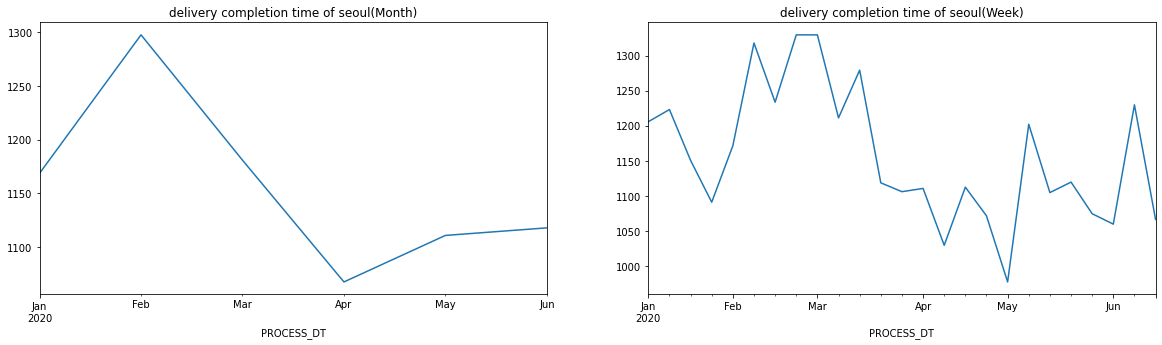

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
seoul_complete_month['second'].plot(ax = axes[0])
seoul_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of seoul(Month)')
axes[1].set_title('delivery completion time of seoul(Week)')

In [23]:
gyeonggido = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'gyeonggido'])
gyeonggido['gyeonggido'] = gyeonggido['DLVR_DSTN_SIDO'] == '경기도'
droped = gyeonggido[gyeonggido['gyeonggido'] == False].index
gyeonggido = gyeonggido.drop(droped)
gyeonggido.index = gyeonggido['PROCESS_DT']
gyeonggido_complete_week = gyeonggido.resample('W').mean()
gyeonggido_complete_month = gyeonggido.resample('M').mean()
gyeonggido_complete_month.head()

,SERIAL_NUMBER,second,gyeonggido
PROCESS_DT,,,
2020-01-31,5.065194e+06,1112.457422,True
2020-02-29,6.081852e+06,1183.421484,True
2020-03-31,7.176433e+06,1054.899543,True
2020-04-30,8.325291e+06,986.418988,True
2020-05-31,9.498383e+06,1008.635046,True


Text(0.5, 1.0, 'delivery completion time of gyeonggido(Week)')

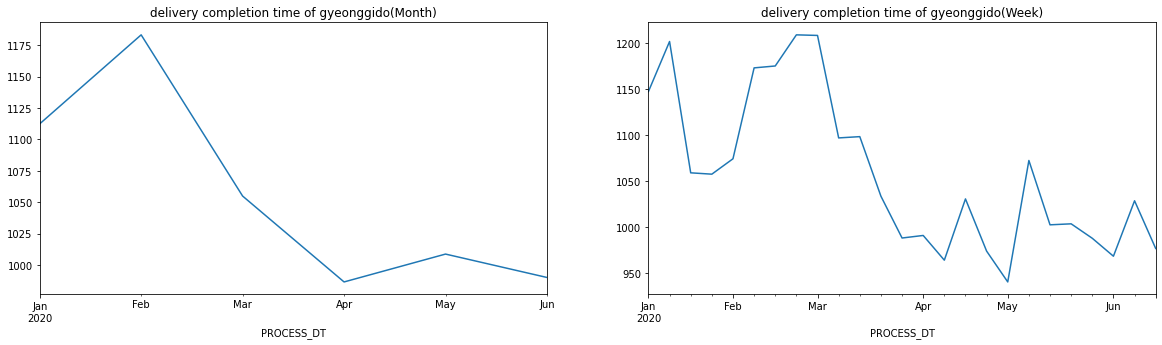

In [24]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
gyeonggido_complete_month['second'].plot(ax = axes[0])
gyeonggido_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of gyeonggido(Month)')
axes[1].set_title('delivery completion time of gyeonggido(Week)')

In [25]:
incheon = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'incheon'])
incheon['incheon'] = incheon['DLVR_DSTN_SIDO'] == '인천광역시'
droped = incheon[incheon['incheon'] == False].index
incheon = incheon.drop(droped)
incheon.index = incheon['PROCESS_DT']
incheon_complete_week = incheon.resample('W').mean()
incheon_complete_month = incheon.resample('M').mean()
incheon_complete_month.head()

,SERIAL_NUMBER,second,incheon
PROCESS_DT,,,
2020-01-31,5.079027e+06,1066.579665,True
2020-02-29,6.074581e+06,1087.745786,True
2020-03-31,7.169542e+06,954.143801,True
2020-04-30,8.322494e+06,914.318156,True
2020-05-31,9.510233e+06,950.589895,True


Text(0.5, 1.0, 'delivery completion time of incheon(Week)')

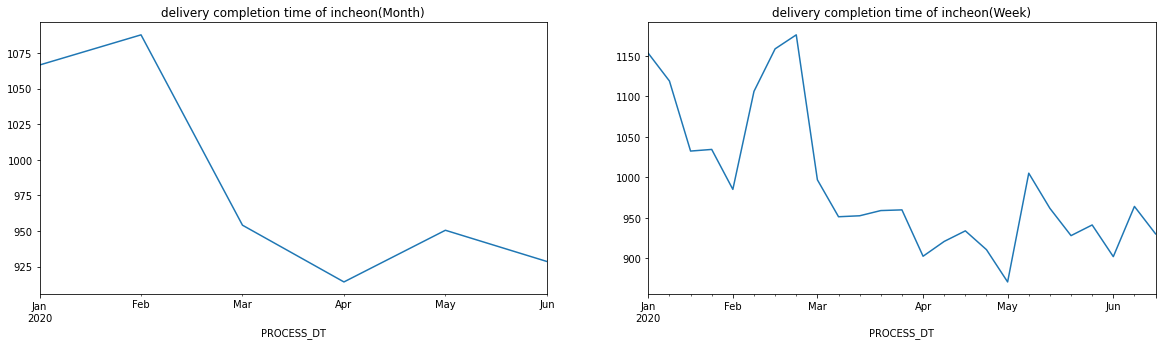

In [26]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
incheon_complete_month['second'].plot(ax = axes[0])
incheon_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of incheon(Month)')
axes[1].set_title('delivery completion time of incheon(Week)')

In [27]:
busan = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'busan'])
busan['busan'] = busan['DLVR_DSTN_SIDO'] == '부산광역시'
droped = busan[busan['busan'] == False].index
busan = busan.drop(droped)
busan.index = busan['PROCESS_DT']
busan_complete_week = busan.resample('W').mean()
busan_complete_month = busan.resample('M').mean()
busan_complete_month.head()

,SERIAL_NUMBER,second,busan
PROCESS_DT,,,
2020-01-31,4.876816e+06,901.961231,True
2020-02-29,6.142427e+06,1558.712815,True
2020-03-31,7.164208e+06,1620.965382,True
2020-04-30,8.328774e+06,993.183480,True
2020-05-31,9.486131e+06,850.677708,True


Text(0.5, 1.0, 'delivery completion time of busan(Week)')

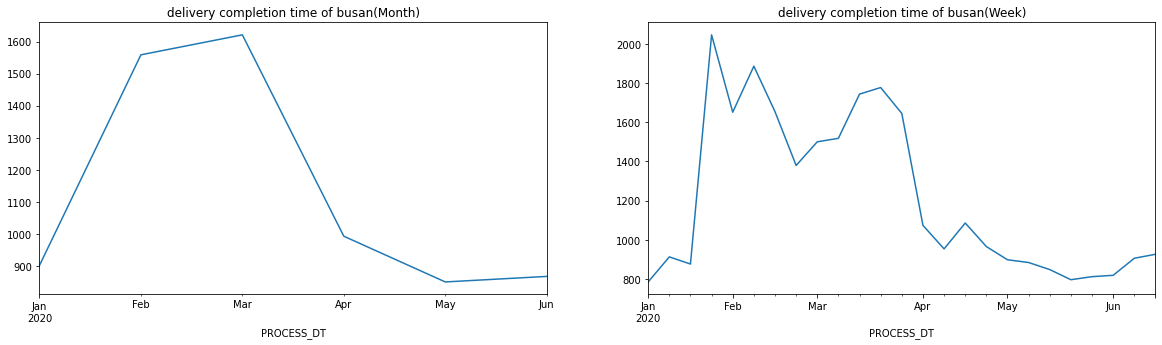

In [28]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
busan_complete_month['second'].plot(ax = axes[0])
busan_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of busan(Month)')
axes[1].set_title('delivery completion time of busan(Week)')

In [29]:
daegu = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'daegu'])
daegu['daegu'] = daegu['DLVR_DSTN_SIDO'] == '대구광역시'
droped = daegu[daegu['daegu'] == False].index
daegu = daegu.drop(droped)
daegu.index = daegu['PROCESS_DT']
daegu_complete_week = daegu.resample('W').mean()
daegu_complete_month = daegu.resample('M').mean()
daegu_complete_month.head()

,SERIAL_NUMBER,second,daegu
PROCESS_DT,,,
2020-01-31,5.057578e+06,839.178693,True
2020-02-29,6.004650e+06,797.606959,True
2020-03-31,7.200702e+06,764.483623,True
2020-04-30,8.316418e+06,799.612316,True
2020-05-31,9.459632e+06,928.826724,True


Text(0.5, 1.0, 'delivery completion time of daegu(Week)')

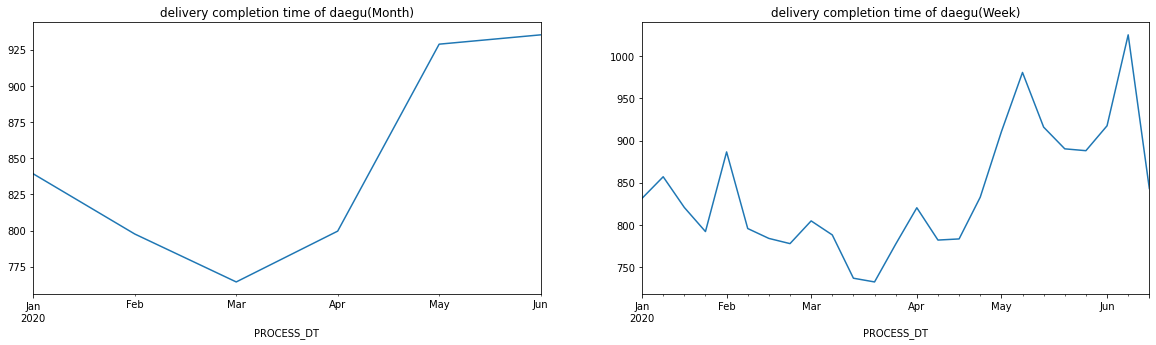

In [30]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
daegu_complete_month['second'].plot(ax = axes[0])
daegu_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of daegu(Month)')
axes[1].set_title('delivery completion time of daegu(Week)')

df dataframe에서 날짜와 지역 기준으로 delivery amount 뽑기

In [31]:
seoul = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'seoul'])
seoul['seoul'] = seoul['DLVR_DSTN_SIDO'] == '서울특별시'
droped = seoul[seoul['seoul'] == False].index
seoul = seoul.drop(droped)
seoul.index = seoul['PROCESS_DT']
seoul_amount_week = seoul.resample('W').count()
seoul_amount_month = seoul.resample('M').count()
seoul_amount_month.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,second,seoul
PROCESS_DT,,,,,
2020-01-31,141525,141525,141525,138986,141525
2020-02-29,150536,150536,150536,147376,150536
2020-03-31,160096,160096,160096,157413,160096
2020-04-30,147864,147864,147864,145843,147864
2020-05-31,150239,150239,150239,147965,150239


Text(0.5, 1.0, 'delivery amount time of seoul(Week)')

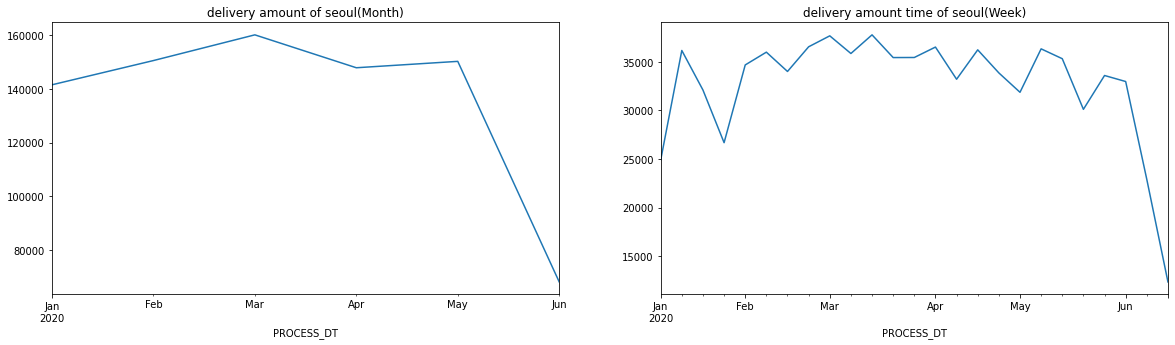

In [32]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
seoul_amount_month['seoul'].plot(ax = axes[0])
seoul_amount_week['seoul'].plot(ax = axes[1])
axes[0].set_title('delivery amount of seoul(Month)')
axes[1].set_title('delivery amount time of seoul(Week)')

In [33]:
incheon = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'incheon'])
incheon['incheon'] = incheon['DLVR_DSTN_SIDO'] == '인천광역시'
droped = incheon[incheon['incheon'] == False].index
incheon = incheon.drop(droped)
incheon.index = incheon['PROCESS_DT']
incheon_amount_week = incheon.resample('W').count()
incheon_amount_month = incheon.resample('M').count()
incheon_amount_month.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_DSTN_SIDO,second,incheon
PROCESS_DT,,,,,
2020-01-31,16060,16060,16060,15540,16060
2020-02-29,13727,13727,13727,13052,13727
2020-03-31,24740,24740,24740,24061,24740
2020-04-30,22147,22147,22147,21502,22147
2020-05-31,21027,21027,21027,20485,21027


Text(0.5, 1.0, 'delivery amount time of incheon(Week)')

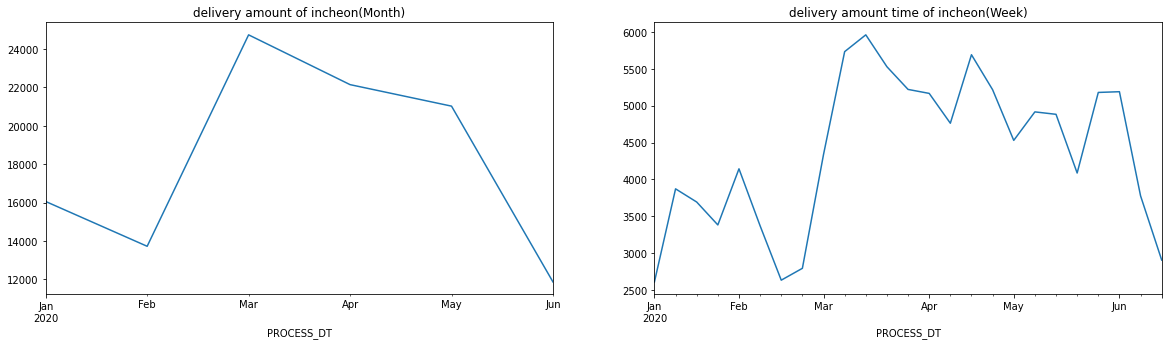

In [34]:
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
incheon_amount_month['incheon'].plot(ax = axes[0])
incheon_amount_week['incheon'].plot(ax = axes[1])
axes[0].set_title('delivery amount of incheon(Month)')
axes[1].set_title('delivery amount time of incheon(Week)')

Text(0.5, 1.0, 'delivery amount time of gyeonggido(Week)')

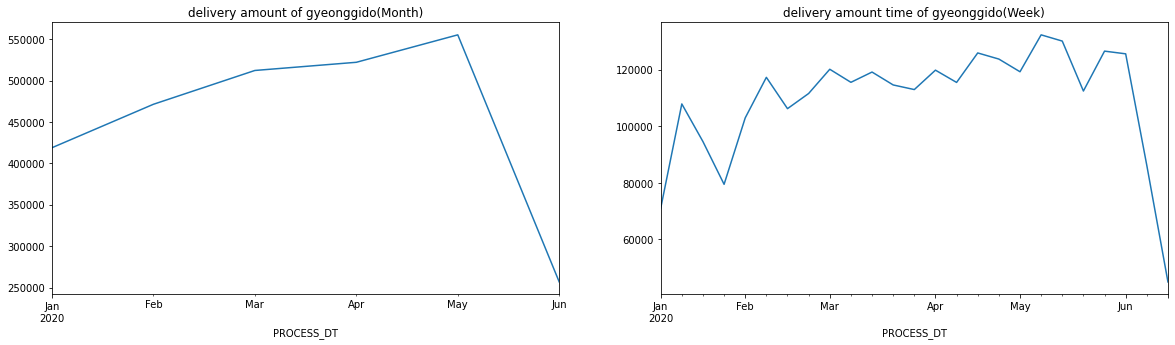

In [35]:
gyeonggido = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'gyeonggido'])
gyeonggido['gyeonggido'] = gyeonggido['DLVR_DSTN_SIDO'] == '경기도'
droped = gyeonggido[gyeonggido['gyeonggido'] == False].index
gyeonggido = gyeonggido.drop(droped)
gyeonggido.index = gyeonggido['PROCESS_DT']
gyeonggido_amount_week = gyeonggido.resample('W').count()
gyeonggido_amount_month = gyeonggido.resample('M').count()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
gyeonggido_amount_month['gyeonggido'].plot(ax = axes[0])
gyeonggido_amount_week['gyeonggido'].plot(ax = axes[1])
axes[0].set_title('delivery amount of gyeonggido(Month)')
axes[1].set_title('delivery amount time of gyeonggido(Week)')

Text(0.5, 1.0, 'delivery amount time of busan(Week)')

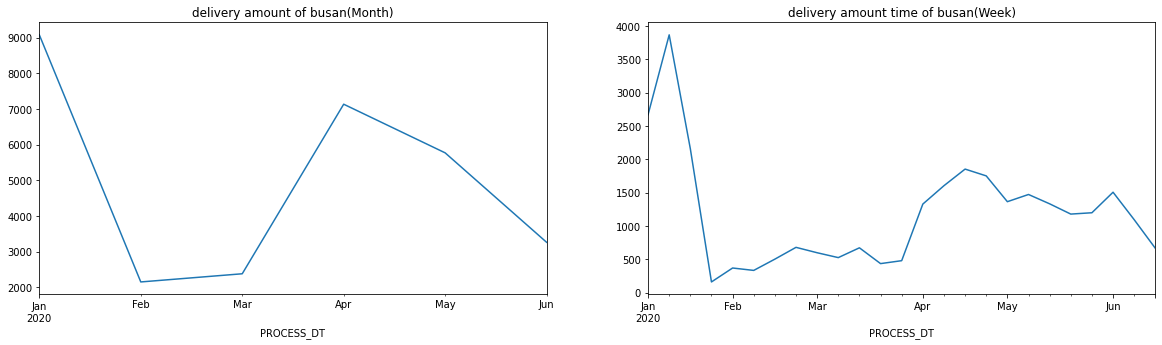

In [36]:
busan = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'busan'])
busan['busan'] = busan['DLVR_DSTN_SIDO'] == '부산광역시'
droped = busan[busan['busan'] == False].index
busan = busan.drop(droped)
busan.index = busan['PROCESS_DT']
busan_amount_week = busan.resample('W').count()
busan_amount_month = busan.resample('M').count()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
busan_amount_month['busan'].plot(ax = axes[0])
busan_amount_week['busan'].plot(ax = axes[1])
axes[0].set_title('delivery amount of busan(Month)')
axes[1].set_title('delivery amount time of busan(Week)')

Text(0.5, 1.0, 'delivery amount time of daegu(Week)')

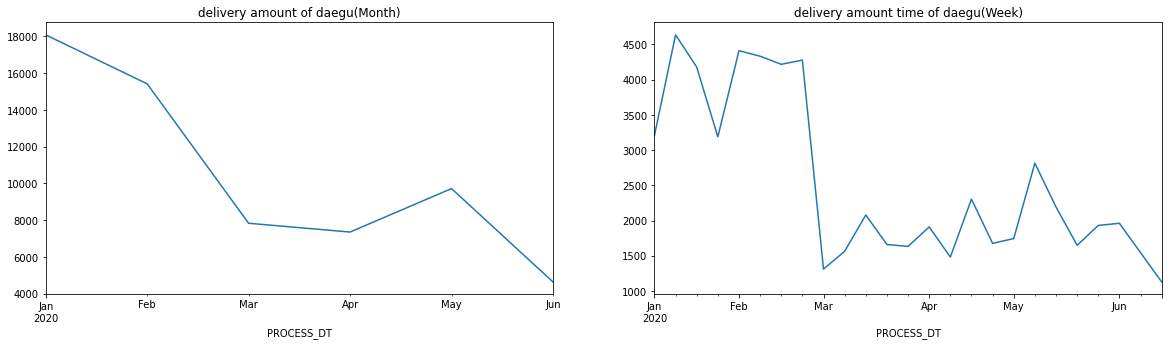

In [37]:
daegu = DataFrame(df, columns = ['SERIAL_NUMBER', 'PROCESS_DT', 'DLVR_DSTN_SIDO', 'second', 'daegu'])
daegu['daegu'] = daegu['DLVR_DSTN_SIDO'] == '대구광역시'
droped = daegu[daegu['daegu'] == False].index
daegu = daegu.drop(droped)
daegu.index = daegu['PROCESS_DT']
daegu_amount_week = daegu.resample('W').count()
daegu_amount_month = daegu.resample('M').count()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
daegu_amount_month['daegu'].plot(ax = axes[0])
daegu_amount_week['daegu'].plot(ax = axes[1])
axes[0].set_title('delivery amount of daegu(Month)')
axes[1].set_title('delivery amount time of daegu(Week)')

delivert completion time과 delivery amount의 상관계수(corr) 확인

In [38]:
seoul_corr = pd.merge(seoul_complete_month, seoul_amount_month, left_index = True, right_index = True)
seoul_corr.head()

,SERIAL_NUMBER_x,second_x,seoul_x,SERIAL_NUMBER_y,PROCESS_DT,DLVR_DSTN_SIDO,second_y,seoul_y
PROCESS_DT,,,,,,,,
2020-01-31,5.062613e+06,1168.661095,True,141525,141525,141525,138986,141525
2020-02-29,6.083589e+06,1297.683700,True,150536,150536,150536,147376,150536
2020-03-31,7.177649e+06,1180.844187,True,160096,160096,160096,157413,160096
2020-04-30,8.312214e+06,1067.320722,True,147864,147864,147864,145843,147864
2020-05-31,9.495399e+06,1110.682574,True,150239,150239,150239,147965,150239


In [39]:
seoul_corr['second_x'].corr(seoul_corr['SERIAL_NUMBER_y'])

0.26583213792362415

In [40]:
gyeonggido_corr = pd.merge(gyeonggido_complete_month, gyeonggido_amount_month, left_index = True, right_index = True)
gyeonggido_corr['second_x'].corr(gyeonggido_corr['SERIAL_NUMBER_y'])

0.0858658265583006

In [41]:
busan_corr = pd.merge(busan_complete_month, busan_amount_month, left_index = True, right_index = True)
busan_corr['second_x'].corr(busan_corr['SERIAL_NUMBER_y'])

-0.6903475285050381

In [42]:
daegu_corr = pd.merge(daegu_complete_month, daegu_amount_month, left_index = True, right_index = True)
daegu_corr['second_x'].corr(daegu_corr['SERIAL_NUMBER_y'])

-0.27580932743386866

전국적으로 확인하기

Text(0.5, 1.0, 'delivery completion time of korea(Week)')

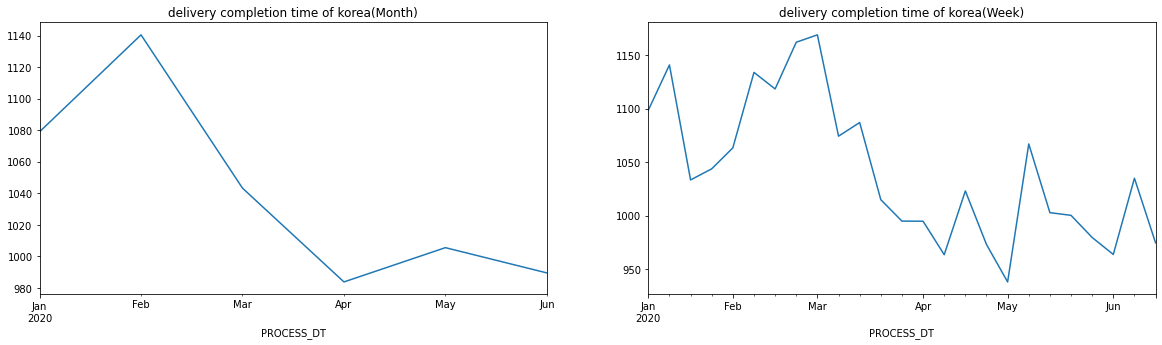

In [43]:
df.index = df['PROCESS_DT']
df_complete_week = df.resample('W').mean()
df_complete_month =df.resample('M').mean()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
df_complete_month['second'].plot(ax = axes[0])
df_complete_week['second'].plot(ax = axes[1])
axes[0].set_title('delivery completion time of korea(Month)')
axes[1].set_title('delivery completion time of korea(Week)')

Text(0.5, 1.0, 'delivery amount of korea(Week)')

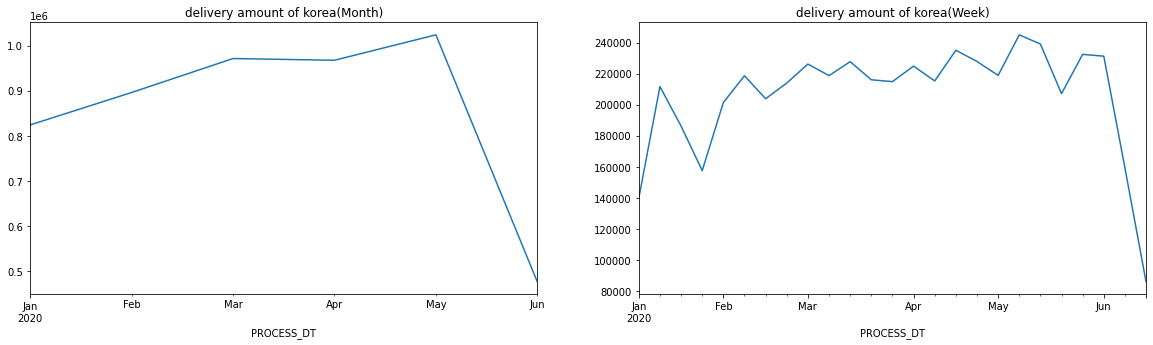

In [44]:
df_amount_week = df.resample('W').count()
df_amount_month =df.resample('M').count()
fig, axes = plt.subplots(nrows = 1, ncols = 2)
fig.set_size_inches(20, 5)
df_amount_month['SERIAL_NUMBER'].plot(ax = axes[0])
df_amount_week['SERIAL_NUMBER'].plot(ax = axes[1])
axes[0].set_title('delivery amount of korea(Month)')
axes[1].set_title('delivery amount of korea(Week)')

In [45]:
korea_corr = pd.merge(df_complete_month, df_amount_month, left_index = True, right_index = True)
korea_corr['second_x'].corr(korea_corr['SERIAL_NUMBER_y'])

0.16846114645093938

# 결론: 코로나 이후 배달량의 증가와 배달 완료 시간은 상관계

* 가설 2: 정책이 격상될 수록 코로나 키워드 검색량이 많아질 것이다.

kaggle의 searchtrend data pandas로 불러오기

In [46]:
trend = pd.read_csv('/content/drive/MyDrive/Post_Covid19/SearchTrend.csv')
trend.head()

,date,cold,flu,pneumonia,coronavirus
0,2016-01-01,0.11663,0.05590,0.15726,0.00736
1,2016-01-02,0.13372,0.17135,0.20826,0.00890
2,2016-01-03,0.14917,0.22317,0.19326,0.00845
3,2016-01-04,0.17463,0.18626,0.29008,0.01145
4,2016-01-05,0.17226,0.15072,0.24562,0.01381


정책 실행날짜와 실행내용이 담겨있는 policy 파일 불러오기

In [47]:
policy = pd.read_csv('/content/drive/MyDrive/Post_Covid19/Policy.csv')
policy.head()

,policy_id,country,type,gov_policy,detail,start_date,end_date
0,1,Korea,Alert,Infectious Disease Alert Level,Level 1 (Blue),2020-01-03,2020-01-19
1,2,Korea,Alert,Infectious Disease Alert Level,Level 2 (Yellow),2020-01-20,2020-01-27
2,3,Korea,Alert,Infectious Disease Alert Level,Level 3 (Orange),2020-01-28,2020-02-22
3,4,Korea,Alert,Infectious Disease Alert Level,Level 4 (Red),2020-02-23,NaN
4,5,Korea,Immigration,Special Immigration Procedure,from China,2020-02-04,NaN


In [48]:
policy.values

array([[1, 'Korea', 'Alert', 'Infectious Disease Alert Level',
        'Level 1 (Blue)', '2020-01-03', '2020-01-19'],
       [2, 'Korea', 'Alert', 'Infectious Disease Alert Level',
        'Level 2 (Yellow)', '2020-01-20', '2020-01-27'],
       [3, 'Korea', 'Alert', 'Infectious Disease Alert Level',
        'Level 3 (Orange)', '2020-01-28', '2020-02-22'],
       [4, 'Korea', 'Alert', 'Infectious Disease Alert Level',
        'Level 4 (Red)', '2020-02-23', nan],
       [5, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from China', '2020-02-04', nan],
       [6, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from Hong Kong', '2020-02-12', nan],
       [7, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from Macau', '2020-02-12', nan],
       [8, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from Japan', '2020-03-09', nan],
       [9, 'Korea', 'Immigration', 'Special Immigration Procedure',
        'from Italy', 

In [49]:
trend.iloc[1641]

date           2020-06-29
cold              0.14263
flu               0.04308
pneumonia         0.11254
coronavirus       2.41501
Name: 1641, dtype: object

In [50]:
trend.iloc[1400]

date           2019-11-01
cold              0.12054
flu               0.24426
pneumonia         0.24899
coronavirus       0.00772
Name: 1400, dtype: object

trend dataframe의 날짜 열의 data type 확인

In [51]:
type(trend['date'][0])

str

datatime type으로 바꿔주기

In [52]:
trend['date'] = pd.to_datetime(trend['date'])

true와 false값을 저장할 T/F 열 추가

In [53]:
trend = DataFrame(trend, columns = ['date', 'cold', 'flu', 'pneumonia', 'coronavirus', 'T/F'])
trend.head()

,date,cold,flu,pneumonia,coronavirus,T/F
0,2016-01-01,0.11663,0.05590,0.15726,0.00736,NaN
1,2016-01-02,0.13372,0.17135,0.20826,0.00890,NaN
2,2016-01-03,0.14917,0.22317,0.19326,0.00845,NaN
3,2016-01-04,0.17463,0.18626,0.29008,0.01145,NaN
4,2016-01-05,0.17226,0.15072,0.24562,0.01381,NaN


trend file에 2016부터의 자료가 있으므로 2019년 11월쯤의 자료만 모아보기

In [54]:
trend['T/F'] = trend.date > pd.to_datetime('2019-10-31')
trend.loc[1400:]

,date,cold,flu,pneumonia,coronavirus,T/F
1400,2019-11-01,0.12054,0.24426,0.24899,0.00772,True
1401,2019-11-02,0.10226,0.19917,0.20190,0.00872,True
1402,2019-11-03,0.11099,0.18735,0.18690,0.00590,True
1403,2019-11-04,0.14917,0.27926,0.31999,0.00754,True
1404,2019-11-05,0.15617,0.27090,0.30717,0.01272,True
...,...,...,...,...,...,...
1637,2020-06-25,0.12072,0.04190,0.11936,2.16993,True
1638,2020-06-26,0.11381,0.03027,0.11317,2.15139,True
1639,2020-06-27,0.10554,0.02136,0.08354,1.96848,True
1640,2020-06-28,0.12563,0.02872,0.08072,2.19720,True


In [55]:
droped = trend[trend['T/F'] == False].index
trend = trend.drop(droped)
trend.head()

,date,cold,flu,pneumonia,coronavirus,T/F
1400,2019-11-01,0.12054,0.24426,0.24899,0.00772,True
1401,2019-11-02,0.10226,0.19917,0.20190,0.00872,True
1402,2019-11-03,0.11099,0.18735,0.18690,0.00590,True
1403,2019-11-04,0.14917,0.27926,0.31999,0.00754,True
1404,2019-11-05,0.15617,0.27090,0.30717,0.01272,True


In [56]:
trend.index = trend['date']
trend.head()

,date,cold,flu,pneumonia,coronavirus,T/F
date,,,,,,
2019-11-01,2019-11-01,0.12054,0.24426,0.24899,0.00772,True
2019-11-02,2019-11-02,0.10226,0.19917,0.20190,0.00872,True
2019-11-03,2019-11-03,0.11099,0.18735,0.18690,0.00590,True
2019-11-04,2019-11-04,0.14917,0.27926,0.31999,0.00754,True
2019-11-05,2019-11-05,0.15617,0.27090,0.30717,0.01272,True


사회적 거리두기 단계에 따른 searchtrend 살펴보기

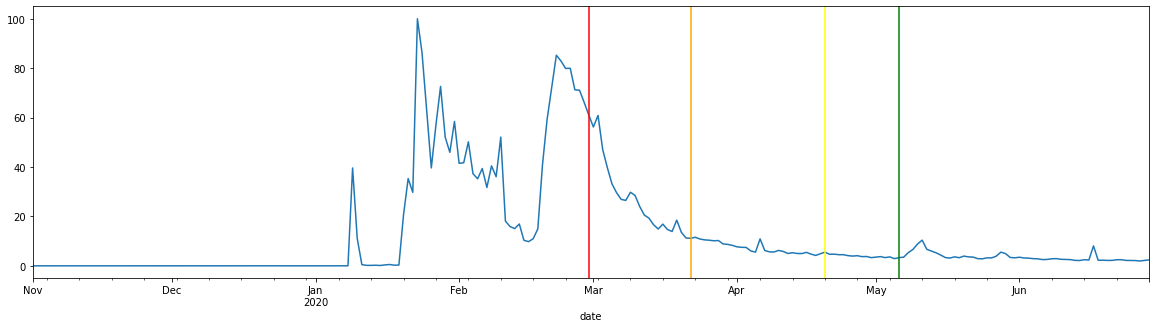

In [57]:
trend['coronavirus'].plot(figsize=(20,5))
plt.axvline(x='2020-02-29', ymin=0.0, ymax=1.0, color='red')
plt.axvline(x='2020-03-22', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-04-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-05-06', ymin=0.0, ymax=1.0, color='green')

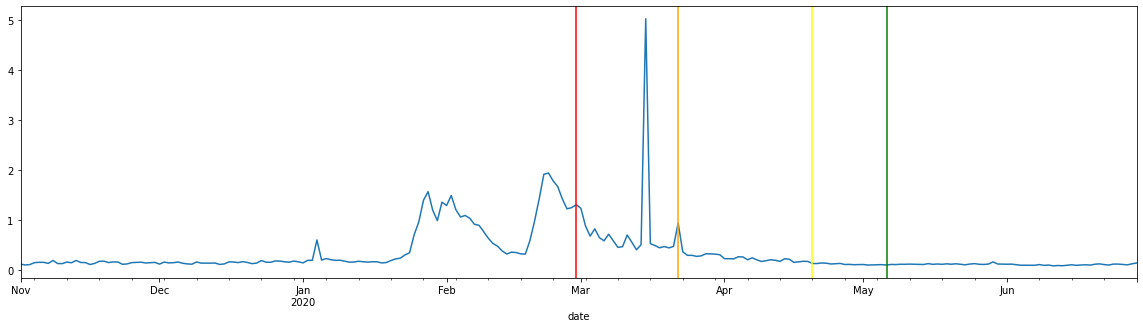

In [58]:
trend['cold'].plot(figsize=(20,5))
plt.axvline(x='2020-02-29', ymin=0.0, ymax=1.0, color='red')
plt.axvline(x='2020-03-22', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-04-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-05-06', ymin=0.0, ymax=1.0, color='green')

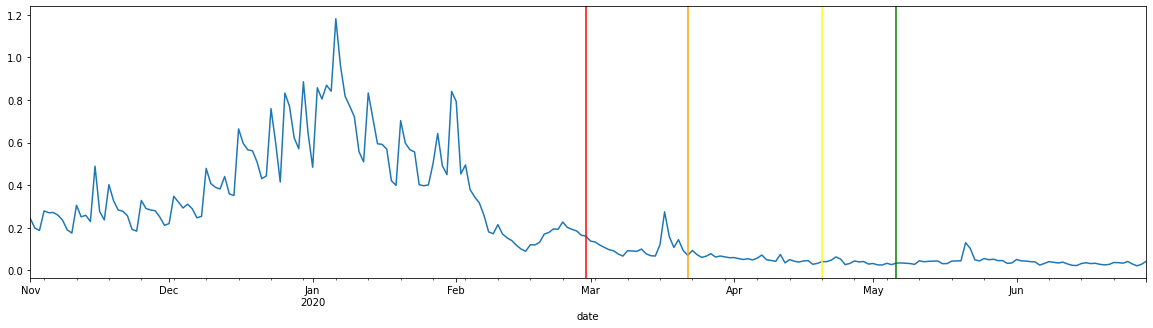

In [59]:
trend['flu'].plot(figsize=(20,5))
plt.axvline(x='2020-02-29', ymin=0.0, ymax=1.0, color='red')
plt.axvline(x='2020-03-22', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-04-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-05-06', ymin=0.0, ymax=1.0, color='green')

전염 경보 레벨에 따른 searchtrend 변화

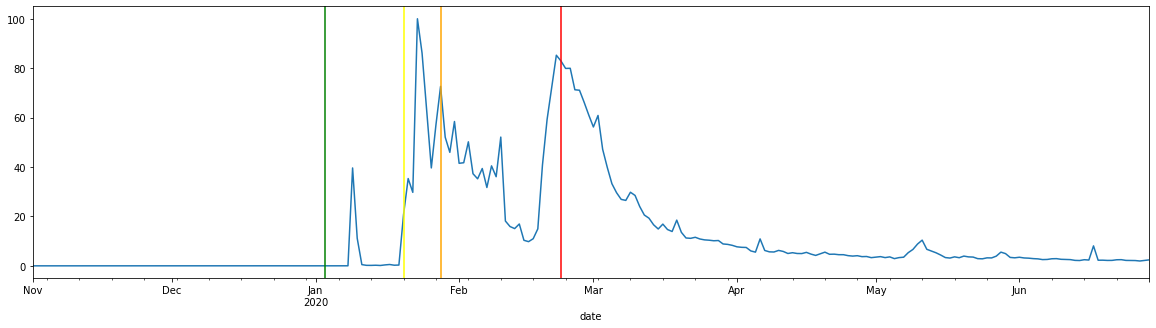

In [60]:
trend['coronavirus'].plot(figsize=(20,5))
plt.axvline(x='2020-01-03', ymin=0.0, ymax=1.0, color='green')
plt.axvline(x='2020-01-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-01-28', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-02-23', ymin=0.0, ymax=1.0, color='red')

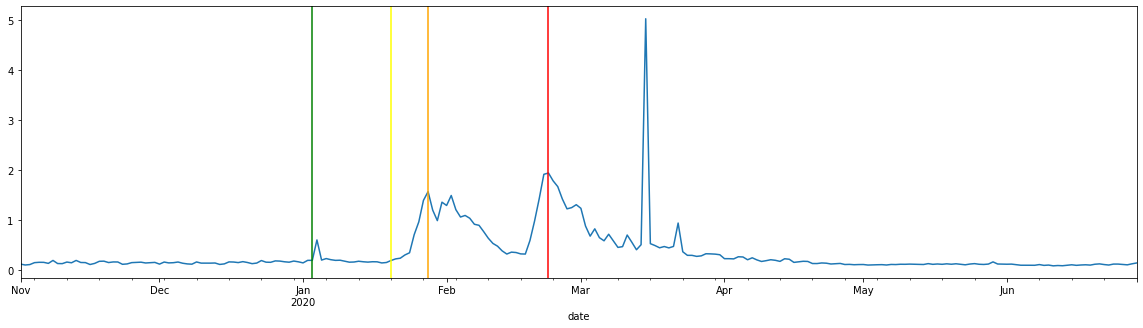

In [61]:
trend['cold'].plot(figsize=(20,5))
plt.axvline(x='2020-01-03', ymin=0.0, ymax=1.0, color='green')
plt.axvline(x='2020-01-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-01-28', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-02-23', ymin=0.0, ymax=1.0, color='red')

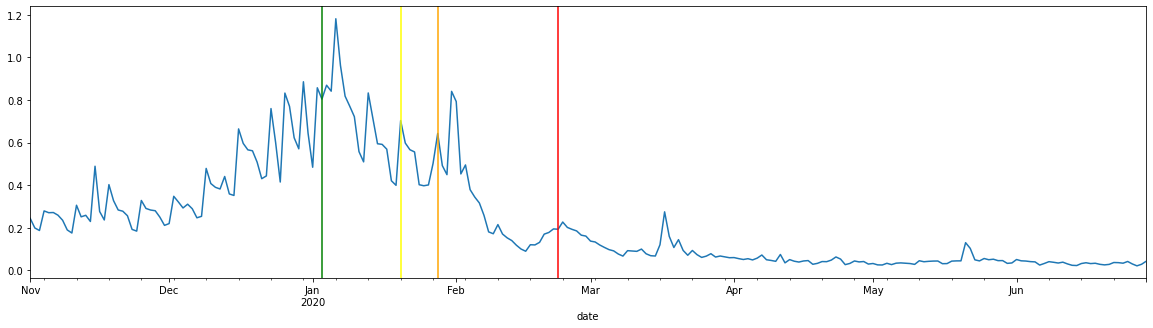

In [62]:
trend['flu'].plot(figsize=(20,5))
plt.axvline(x='2020-01-03', ymin=0.0, ymax=1.0, color='green')
plt.axvline(x='2020-01-20', ymin=0.0, ymax=1.0, color='yellow')
plt.axvline(x='2020-01-28', ymin=0.0, ymax=1.0, color='orange')
plt.axvline(x='2020-02-23', ymin=0.0, ymax=1.0, color='red')

search trend 간의 상관계수(corr) 확인하기

In [63]:
trend.corr()

,cold,flu,pneumonia,coronavirus,T/F
cold,1.000000,0.067614,0.218791,0.684278,NaN
flu,0.067614,1.000000,0.429369,0.065522,NaN
pneumonia,0.218791,0.429369,1.000000,0.412048,NaN
coronavirus,0.684278,0.065522,0.412048,1.000000,NaN
T/F,NaN,NaN,NaN,NaN,NaN


누적 확진자 수가 기록된 Time.csv 파일 불러오기

In [64]:
confirmed = pd.read_csv('/content/drive/MyDrive/Post_Covid19/Time.csv', usecols = ['date', 'confirmed'])
confirmed.head()

,date,confirmed
0,2020-01-20,1
1,2020-01-21,1
2,2020-01-22,1
3,2020-01-23,1
4,2020-01-24,2


누적 확진자 수 데이터에서 일일 확진자 수 데이터 구하기

In [65]:
confirmed=confirmed.sort_values(['date'],ascending=False)
confirmed=confirmed.reset_index()
confirmed=confirmed.drop(['index'],axis=1)

dict_case=[]
for i in range(len(confirmed)-1):
    dict_case.append(confirmed['confirmed'][i]-confirmed['confirmed'][i+1])
dict_case.append(1)

confirmed['daily']=dict_case
confirmed=confirmed.sort_values(['date'],ascending=True)
confirmed=confirmed.reset_index()
confirmede=confirmed.drop(['index'],axis=1)
confirmed.head()

,index,date,confirmed,daily
0,162,2020-01-20,1,1
1,161,2020-01-21,1,0
2,160,2020-01-22,1,0
3,159,2020-01-23,1,0
4,158,2020-01-24,2,1


In [66]:
type(confirmed['date'][0])

str

In [67]:
confirmed['date'] = pd.to_datetime(confirmed['date'])
type(confirmed['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [68]:
confirmed.index = confirmed['date']
confirmed.head()

,index,date,confirmed,daily
date,,,,
2020-01-20,162,2020-01-20,1,1
2020-01-21,161,2020-01-21,1,0
2020-01-22,160,2020-01-22,1,0
2020-01-23,159,2020-01-23,1,0
2020-01-24,158,2020-01-24,2,1


일일 확진자 시각화

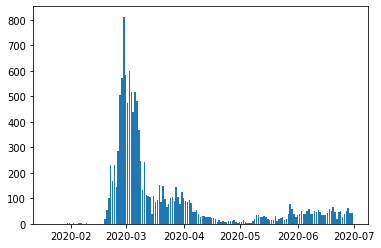

In [69]:
plt.bar(confirmed['date'], confirmed['daily'])
plt.rcParams['figure.figsize'] = [20,1]
plt.show()

In [70]:
new = pd.merge(confirmed, trend, left_index = True, right_index = True)
new.head()

,index,date_x,confirmed,daily,date_y,cold,flu,pneumonia,coronavirus,T/F
date,,,,,,,,,,
2020-01-20,162,2020-01-20,1,1,2020-01-20,0.19217,0.70343,3.63716,20.69610,True
2020-01-21,161,2020-01-21,1,0,2020-01-21,0.22462,0.59789,4.31987,35.33284,True
2020-01-22,160,2020-01-22,1,0,2020-01-22,0.23808,0.56661,3.66416,29.74474,True
2020-01-23,159,2020-01-23,1,0,2020-01-23,0.30308,0.55625,3.18035,100.00000,True
2020-01-24,158,2020-01-24,2,1,2020-01-24,0.34689,0.40226,2.48156,86.11541,True


In [71]:
new['daily'].corr(new['coronavirus'])

0.4085281663390897

# 결론: searchtrend와 정책 격상과의 관계-> 격상 당시에는 증가하지만, 그 이후로는 익숙해져 searchtrend가 급격히 감소한다.
# 또한 searchtrend는 일일 확진자 수와 양의 상관관계를 보인다.

# 가설1. 배달 시장의 수요가 증가로 인해 배달비가 인상될 것이다.

In [72]:
delivery.head()

,SERIAL_NUMBER,PROCESS_DT,DLVR_RQESTER_ID,DLVR_REQUST_STTUS_VALUE,DLVR_RCEPT_CMPNY_ID,DLVR_STORE_ID,DLVR_STORE_INDUTY_NM,DLVR_STORE_LEGALDONG_CODE,DLVR_STORE_SIDO,DLVR_STORE_SIGUNGU,DLVR_STORE_DONG,DLVR_STORE_RI,DLVR_STORE_ADSTRD_CODE,DLVR_STORE_RDNMADR_CODE,DLVR_DSTN_LEGALDONG_CODE,DLVR_DSTN_SIDO,DLVR_DSTN_SIGUNGU,DLVR_DSTN_DONG,DLVR_DSTN_RI,DLVR_DSTN_ADSTRD_CODE,DLVR_DSTN_RDNMADR_CODE,DLVR_MAN_ID,DLVR_AMOUNT,CALL_RLAY_FEE_AMOUNT,GOODS_AMOUNT,SETLE_KND_VALUE,SETLE_CARD_CN,DLVR_RCEPT_TIME,DLVR_CARALC_TIME,DLVR_COMPT_TIME,DLVR_CANCL_TIME
0,4577985,2020-01-01,C000035,1,C000035,S0032342,치킨,4812710600,경상남도,창원시 마산회원구,합성동,NaN,4812759000,4.812748e+11,4.812710e+09,경상남도,창원시 마산회원구,석전동,NaN,4.812754e+09,4.812748e+11,D0005271,4290,300,25000,1,승인:비씨카드사,2020-01-01 00:15:49,2020-01-01 00:21:38,2020-01-01 00:41:37,NaN
1,4577986,2020-01-01,C000237,1,C000237,S0021847,찜탕,4121010200,경기도,광명시,철산동,NaN,4121061000,4.121030e+11,1.154510e+09,서울특별시,금천구,가산동,NaN,1.154551e+09,1.154531e+11,D0003269,4800,200,49000,2,NaN,2020-01-01 01:12:14,2020-01-01 01:21:41,2020-01-01 01:31:44,NaN
2,4577988,2020-01-01,C000129,1,C000129,S0025740,치킨,1138010400,서울특별시,은평구,갈현동,NaN,1138055100,1.138041e+11,1.138010e+09,서울특별시,은평구,갈현동,NaN,1.138055e+09,1.138041e+11,D0001536,3300,300,23000,3,승인:,2020-01-01 00:01:14,2020-01-01 00:01:47,2020-01-01 00:18:47,NaN
3,4577989,2020-01-01,C000029,1,C000043,S0039634,한식,4115010100,경기도,의정부시,의정부동,NaN,4115051000,4.115043e+11,4.115010e+09,경기도,의정부시,의정부동,NaN,4.115051e+09,4.115043e+11,D0005061,4500,300,20000,2,NaN,2020-01-01 01:01:34,2020-01-01 01:28:06,2020-01-01 01:36:48,NaN
4,4577991,2020-01-01,C000130,1,C000130,S0002237,한식,4128112800,경기도,고양시 덕양구,행신동,NaN,4128164000,4.128144e+11,4.128110e+09,경기도,고양시 덕양구,주교동,NaN,4.128151e+09,4.128144e+11,D0005215,6500,300,32000,2,NaN,2020-01-01 01:05:06,2020-01-01 01:08:01,2020-01-01 01:29:00,NaN


### 1) 주 단위로 평균량 시각화
* delivery 데이터에서 데이터 순서를 나타내는 'SERIAL_NUMBER' 데이터를 이용해 배달 주문량을 계산
* 'SERIAL_NUMBER'를 주 단위로 count하여 시각화함

In [ ]:
#주 단위로 count 하기 (배달 주문량)

delivery['date'] = pd.to_datetime(delivery['PROCESS_DT'])
delivery['date'] = delivery['date'].apply( lambda delivery: datetime.datetime(year=delivery.year, month=delivery.month, day=delivery.day))
delivery.set_index('date',inplace=True)

delivery_weekly_count = delivery.resample('W').count()

delivery_weekly_count.SERIAL_NUMBER

In [ ]:
#주문량 시각화 (weekly count)

fig = plt.figure()
fig.set_size_inches(6, 6)
plt.plot(delivery_weekly_count['SERIAL_NUMBER'], c='purple', marker='.')
plt.title('배달 주문량 (weekly count)', fontsize = 14)
plt.show()

In [ ]:
delivery_monthly_count = delivery.resample('M').count()

fig = plt.figure()
fig.set_size_inches(6, 6)
plt.plot(delivery_monthly_count['SERIAL_NUMBER'], c='purple', marker='.')
plt.title('배달 주문량 (monthly count)', fontsize = 14)
plt.show()

- 결과
    * 4월까지 증가 & 5월에서 6월까지 증가

### 2) 수수료 & 배달비 증가 시각화

In [ ]:
#수수료 & 배달비 

delivery[["DLVR_AMOUNT","CALL_RLAY_FEE_AMOUNT"]].head(10)

- 월 별로 배달비 & 수수료의 변화 추세를 시각화 (평균값)

In [ ]:
#월 단위로 평균값 계산
delivery_weekly_avg = delivery.resample('W').mean()
delivery_monthly_avg = delivery.resample('M').mean()

delivery_monthly_avg[["DLVR_AMOUNT","CALL_RLAY_FEE_AMOUNT"]]

In [ ]:
# 시간에 따른 수수료 & 배달비 변화 시각화 -> monthly

fig = plt.figure()
fig.set_size_inches(11,5)
ax = []

delivery_monthly_avg = delivery.resample('M').mean()

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].plot(delivery_monthly_avg["DLVR_AMOUNT"], c="orangered", linestyle="-")
ax[1].plot(delivery_monthly_avg["CALL_RLAY_FEE_AMOUNT"],color="limegreen", linestyle="-", label='수수료') 

ax[0].set_title("배달비 변화 추세 (monthly avg)",fontsize="13")
ax[0].set_ylabel("(단위: 원)")

ax[1].set_title("수수료 변화 추세(monthly avg)",fontsize="13")

plt.legend(shadow=False, fancybox=True)

plt.show()

In [ ]:
#weekly average

fig = plt.figure()
fig.set_size_inches(11,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].plot(delivery_weekly_avg["DLVR_AMOUNT"], c="r", linestyle="-")
ax[1].plot(delivery_weekly_avg["CALL_RLAY_FEE_AMOUNT"],color="b", linestyle="-", label='수수료') 

ax[0].set_title("배달비 변화 추세 (weekly avg)",fontsize="13")
ax[0].set_ylabel("(단위: 원)")

ax[1].set_title("수수료 변화 추세(weekly avg)",fontsize="13")

plt.legend(shadow=False, fancybox=True)

plt.show()

##### -> weekly average 는 기복이 있었고  montly average로 봤을 때는 흐름을 어느 정도 읽을 수 있었다.

In [ ]:
#주문량과 배달비와의 상관계수 -> weekly

delivery_weekly_avg.DLVR_AMOUNT.corr(delivery_weekly_count.SERIAL_NUMBER)

In [ ]:
#주문량과 배달비와의 상관계수 -> monthly

delivery_monthly_avg.DLVR_AMOUNT.corr(delivery_monthly_count.SERIAL_NUMBER)

In [ ]:
#주문량과 수수료와의 상관계수 -> weekly
            
delivery_weekly_avg.CALL_RLAY_FEE_AMOUNT.corr(delivery_weekly_count.SERIAL_NUMBER)

In [ ]:
#주문량과 수수료와의 상관계수 -> monthly

delivery_monthly_avg.CALL_RLAY_FEE_AMOUNT.corr(delivery_monthly_count.SERIAL_NUMBER)

In [ ]:
#배달비와 수수료의 상관계수 -> weekly

delivery_weekly_avg.CALL_RLAY_FEE_AMOUNT.corr(delivery_weekly_count.DLVR_AMOUNT)

In [ ]:
#산점도(scatter plot)를 통해 배달비&주문량 , 수수료&주문량 상관관계 시각화 -> monthly

fig = plt.figure()
fig.set_size_inches(11,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].scatter(delivery_monthly_count["SERIAL_NUMBER"], delivery_monthly_avg["DLVR_AMOUNT"],c="deeppink")
ax[1].scatter(delivery_monthly_count["SERIAL_NUMBER"],delivery_monthly_avg["CALL_RLAY_FEE_AMOUNT"], color="green",label="수수료") 
          
ax[0].set_title("delivery amount & delivery order",fontsize="13")
ax[1].set_title("commission & delivery order",fontsize="13")


plt.legend(shadow=False, fancybox=True)

plt.show()

In [ ]:
#주문량과 배달비와의 상관계수 -> monthly

delivery_monthly_avg.DLVR_AMOUNT.corr(delivery_monthly_count.SERIAL_NUMBER)

In [ ]:
#주문량과 수수료와의 상관계수 -> monthly

delivery_monthly_count.SERIAL_NUMBER.corr(delivery_monthly_avg.CALL_RLAY_FEE_AMOUNT)

- 역시 상관계수를 봐도 관계성이 없음을 알 수 있다.

In [ ]:
#산점도(scatter plot)를 통해 배달비&주문량 , 수수료&주문량 상관관계 시각화 -> weekly

fig = plt.figure()
fig.set_size_inches(14,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].scatter(delivery_weekly_count["SERIAL_NUMBER"], delivery_weekly_avg["DLVR_AMOUNT"],c="deeppink")
ax[1].scatter(delivery_weekly_count["SERIAL_NUMBER"],delivery_weekly_avg["CALL_RLAY_FEE_AMOUNT"], color="green",label="수수료") 
          
ax[0].set_title("delivery amount & delivery order",fontsize="13")
ax[1].set_title("commission & delivery order",fontsize="13")


plt.legend(shadow=False, fancybox=True)

plt.show()

- weekly 그래프 봤을 때, 주문량과 배달비 그래프가 200000건 이후로 기울기가 급한 선형적인 흐름을 어느 정도 확인할 수 있었다.

In [ ]:
#주문량과 수수료와의 상관계수 -> weekly

delivery_weekly_avg.CALL_RLAY_FEE_AMOUNT.corr(delivery_weekly_count.SERIAL_NUMBER)

In [ ]:
#일 단위로 계산

delivery_daily_avg = delivery.resample('D').mean()
delivery_daily_count = delivery.resample('D').count()

#산점도(scatter plot)를 통해 배달비&주문량 , 수수료&주문량 상관관계 시각화 -> daily

fig = plt.figure()
fig.set_size_inches(14,5)
ax = []

for i in range(1,3):
    ax.append(fig.add_subplot(1,2,i))
ax[0].scatter(delivery_daily_count["SERIAL_NUMBER"],delivery_daily_avg["DLVR_AMOUNT"],c="deeppink")
ax[1].scatter(delivery_daily_count["SERIAL_NUMBER"],delivery_daily_avg["CALL_RLAY_FEE_AMOUNT"], color="green",label="수수료") 
          
ax[0].set_title("delivery order & delivery amount",fontsize="13")
ax[1].set_title("delivery order & commission",fontsize="13")


plt.legend(shadow=False, fancybox=True)

plt.show()

- daily로 시각화 했을 때, 주문량 & 배달비 그래프는 상관관계가 있음을 확실히 알 수 있지만 주문량 & 수수료 그래프는 선형보다 원 모양에 근접하므로 관계성이 거의 없다고 볼 수 있다.

In [ ]:
#주문량과 배달비와의 상관계수 -> daily

delivery_daily_avg.DLVR_AMOUNT.corr(delivery_daily_count.SERIAL_NUMBER)

* 하지만 상관계수를 봤을 때 크게 관련성이 없는 것으로 보인다.

In [ ]:
#주문량과 배달비와의 상관계수 -> daily

delivery_daily_avg.CALL_RLAY_FEE_AMOUNT.corr(delivery_daily_count.SERIAL_NUMBER)

#### <결과>
  - 여러가지 경우에 따라 시각화를 해봤지만 일정한 패턴을 보이지 않는 것으로 보아 가설 1은 틀렸다.

#  가설2: 코로나 확진자가 증가하는 시기에 바디/헤어 용품의 소비율은 감소할 것이다.

-  결과:
   -  배달비와 수수료는 2020년 4월 즈음, 급격하게 증가한 상황을 알 수 있다.
  
   >  배달 주문량의 증가와 배달비 및 수수료의 증가가 서로 연관되어 있다고 추측하였고 
둘의 상관관계가 실제로 존재하는지 확인해보도록 하자.

base_ymd column에서 데이터 출력 방식 정하기

In [ ]:
#base_ymd 컬럼에서 데이터 출력 방식 정하기
fpopl['base_ymd'] = fpopl['base_ymd'].astype(str)
fpopl['base_ymd'] = fpopl['base_ymd'].apply(lambda x : x[:4] + '-' + x[4:6] + '-' +x[-2:])
fpopl['base_ymd'] = pd.to_datetime(fpopl['base_ymd'])

fpopl['month'] = pd.to_datetime(fpopl['base_ymd']).dt.month
fpopl['year'] = pd.to_datetime(fpopl['base_ymd']).dt.year

fpopl.head()

In [ ]:
#월 별 count
#fpopl_month_count = fpopl.resample('W').count()

ingusu =  fpopl.groupby("month")["popltn_cascnt"].mean()
ingusu

In [ ]:
#월 별로 유동인구 수 비교

ingusu.plot(x="month", y="popltn_cascnt", c="r", linestyle="dashed", marker='o', label='인구 수(단위: 명)')
plt.grid(True, c=".7")
plt.title("월 별 유동인구 수 (평균)")
plt.legend(shadow=True)
plt.xlabel("month")
plt.ylabel("유동 인구")

전국적으로 3월달 까지는 인구 수가 줄어들다가 3월 이후로 증가함을 알 수 있다.

* 시간에 따른 바디, 헤어 용품 구매율 변화 시각화

In [ ]:
index['period'] = index['period'].astype(str)
index['period'] = index['period'].apply(lambda x : x[:4] + '-' + x[-2:])
index['period'] = pd.to_datetime(index['period'])
index['month'] = pd.to_datetime(index['period']).dt.month
index['year'] = pd.to_datetime(index['period']).dt.year

index.head()

In [ ]:
# catm 컬럼의 유일한 값 추출

index['catm'].unique()

In [ ]:
# 월 별로 바디/헤어용품을 얼마나 소비하는지 count

grouped = index.groupby("catm")
df = grouped.get_group("바디/헤어용품")
df.head()

In [ ]:
df_cgi = df[df['year']==2020].groupby('month')['cgi'].mean()

df_cgi

In [ ]:
# 바디/헤어용품 소비지수 변화 시각화

fig = plt.figure()
fig.set_size_inches(6, 6)
df_cgi.plot(x="month", y="cgi", c="b", linestyle="-", marker='o', label='2020년 바디/헤어용품 cgi')
plt.ylabel("cgi")
plt.title('2020년 바디/헤어용품 cgi (mean)', fontsize = 14)
plt.show()

In [ ]:
#성별에 따른 바디/헤어용품 소비율 비교
df_pv = df.pivot_table(['cgi'],index = ['year', 'month'], columns = index.gender)
df_pv


#sns.lineplot(x="month", y="cgi", hue="gender", data=df_pv)

In [ ]:
fig = plt.figure()
fig.set_size_inches(12, 12)
df_pv.plot()